<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Face_LandMark_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face LandMark Detection**

In [2]:
! unzip /content/https:/www.kaggle.com/datasets/drgilermo/face-images-with-marked-landmark-points/face-images-with-marked-landmark-points.zip

Archive:  /content/https:/www.kaggle.com/datasets/drgilermo/face-images-with-marked-landmark-points/face-images-with-marked-landmark-points.zip
  inflating: face_images.npz         
  inflating: facial_keypoints.csv    


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split

In [4]:
feature = np.load("face_images.npz")
feature = feature.get(feature.files[0])
feature = np.moveaxis(feature, -1, 0)
feature = feature.reshape(feature.shape[0], feature.shape[1], feature.shape[2], 1)
feature.shape

(7049, 96, 96, 1)

In [5]:
face_keys = pd.read_csv("facial_keypoints.csv")
face_keys.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [6]:
face_keys.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [7]:
face_keys.fillna(0, inplace=True)

In [8]:
face_keys.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [9]:
new_feature = feature[face_keys.index.values, :, :, :]
new_feature = new_feature/255.0

In [10]:
face_keys.reset_index(inplace=True,  drop = True)

In [11]:
def plt_img_with_lmrk(img_array, img_lmrk, index):
  plt.imshow(img_array[index, :, :, 0], cmap = "gray")
  plt.scatter(img_lmrk.iloc[index][0: -1: 2], img_lmrk.iloc[index][1: : 2], c = 'y')
  plt.show()

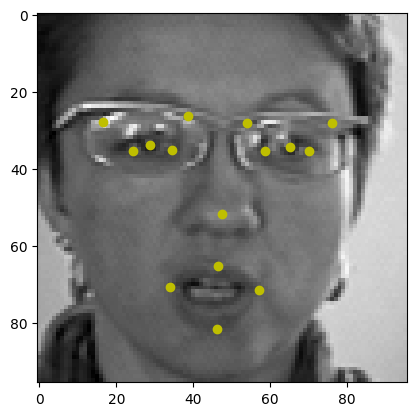

In [12]:
plt_img_with_lmrk(new_feature, face_keys, 10)

In [13]:
x_train, x_test,  y_train, y_test = train_test_split(new_feature, face_keys, test_size = 0.2)

In [14]:
print(f"x_train shape is :: {x_train.shape}, x_test shape is :: {x_test.shape}")
print(f"y_train shape is :: {y_train.shape}, y_test shape is :: {y_test.shape}")

x_train shape is :: (5639, 96, 96, 1), x_test shape is :: (1410, 96, 96, 1)
y_train shape is :: (5639, 30), y_test shape is :: (1410, 30)


In [15]:
from tqdm.keras import TqdmCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

In [18]:
model = Sequential()
model.add(Input(shape = (96, 96, 1)))

model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding = "same", kernel_initializer = glorot_uniform()))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding = "same", kernel_initializer = glorot_uniform()))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding = "same", kernel_initializer = glorot_uniform()))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, kernel_initializer = glorot_uniform()))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer = glorot_uniform()))
model.add(LeakyReLU(alpha = 0))

model.add(Dense(30, kernel_initializer = glorot_uniform()))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 96, 96, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        1

In [21]:
model.compile(optimizer = Adam(), loss = "mean_squared_error", metrics = ["mean_squared_error"])

In [22]:
history = model.fit(x_train, y_train,
                    batch_size = 100,
                    epochs = 150,
                    validation_data = (x_test, y_test),
                    shuffle = True,
                    verbose = 1)

Epoch 1/150
57/57 [==============================] - 19s 74ms/step - loss: 505.3462 - mean_squared_error: 505.3462 - val_loss: 937.8896 - val_mean_squared_error: 937.8896
Epoch 2/150
57/57 [==============================] - 3s 58ms/step - loss: 278.5150 - mean_squared_error: 278.5150 - val_loss: 854.0444 - val_mean_squared_error: 854.0444
Epoch 3/150
57/57 [==============================] - 3s 57ms/step - loss: 215.3924 - mean_squared_error: 215.3924 - val_loss: 805.6788 - val_mean_squared_error: 805.6788
Epoch 4/150
57/57 [==============================] - 3s 54ms/step - loss: 194.8248 - mean_squared_error: 194.8248 - val_loss: 749.8736 - val_mean_squared_error: 749.8736
Epoch 5/150
57/57 [==============================] - 3s 58ms/step - loss: 170.1615 - mean_squared_error: 170.1615 - val_loss: 744.4100 - val_mean_squared_error: 744.4100
Epoch 6/150
57/57 [==============================] - 3s 57ms/step - loss: 156.5052 - mean_squared_error: 156.5052 - val_loss: 677.5893 - val_mean_squ

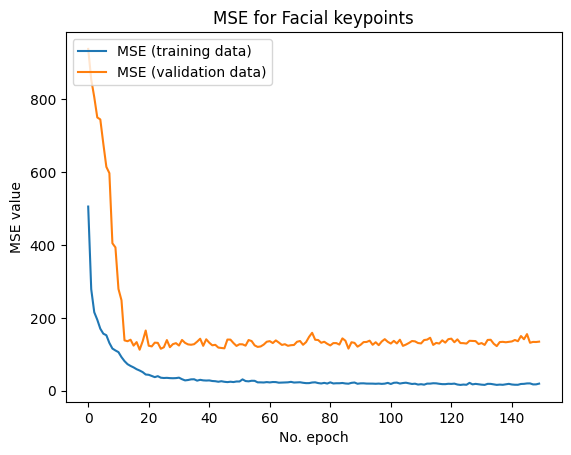

In [23]:
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Facial keypoints')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [24]:
pred = model.predict(x_test)

45/45 [==============================] - 1s 7ms/step


In [25]:
def plot_pred_img(imgs, truth, pred, index):
  plt.imshow(imgs[index, :, :, 0], cmap = "gray")

  t = np.array(truth)[index]
  plt.scatter(t[0::2], t[1::2], c = "y")

  p = pred[index, :]
  plt.scatter(p[0::2], p[1::2], c = "g")

  plt.show()

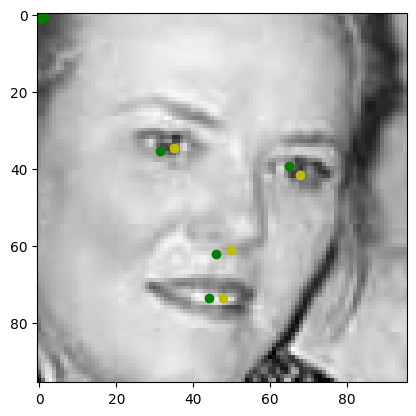

In [27]:
plot_pred_img(x_test, y_test, pred, 3)

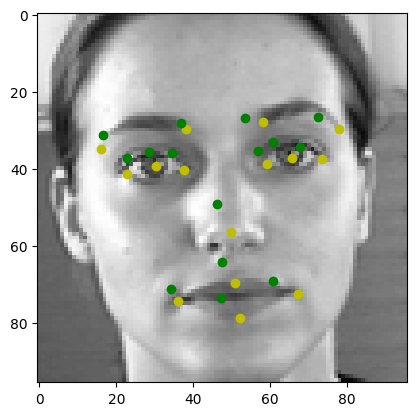

In [28]:
plot_pred_img(x_test, y_test, pred, 20)

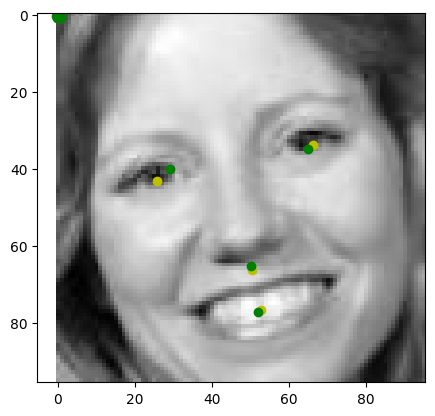

In [30]:
plot_pred_img(x_test, y_test, pred, 29)